In [1]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)

import matplotlib
import matplotlib.pyplot as plt
font = {'size' : 20}
matplotlib.rc('font', **font)

import seaborn as sns

from pylab import rcParams
rcParams["figure.figsize"] = 30,16

import sklearn
from sklearn import metrics

import numpy as np
import scipy

import datetime as dt
from datetime import date

from collections import OrderedDict

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.insert(0, "../")
import functions

# <font size="7">Vergleich der Sichtweite</font>

In [3]:
#Daten aus jeweiliger CSV-Datei laden
df = pd.read_csv("Datenbeschaffung/kalender.csv", index_col=0, parse_dates=True, usecols=[0,2])
df = df.join(pd.read_csv("Datenbeschaffung/stuttgart.csv", index_col=0, parse_dates=True, usecols=[0,3], squeeze=True).rename("stuttgart"))
df = df.join(pd.read_csv("Datenbeschaffung/freiburg.csv", index_col=0, parse_dates=True, usecols=[0,3], squeeze=True).rename("freiburg"))
df = df.join(pd.read_csv("Datenbeschaffung/mannheim.csv", index_col=0, parse_dates=True, usecols=[0,3], squeeze=True).rename("mannheim"))
df = df.join(pd.read_csv("Datenbeschaffung/ulm.csv", index_col=0, parse_dates=True, usecols=[0,3], squeeze=True).rename("ulm"))

#Durchschnitt berechnen
df["durchschnitt"] = round(((df["stuttgart"] + df["freiburg"] + df["mannheim"] + df["ulm"]) / 4), 1)

print(df)

             wochentag  stuttgart  freiburg  mannheim   ulm  durchschnitt
datum                                                                    
2015-01-01  Donnerstag        5.3       7.0       2.0   2.5           4.2
2015-01-02     Freitag        7.6       6.6       9.3   9.0           8.1
2015-01-03     Samstag        7.8       5.1       5.4   7.6           6.5
2015-01-04     Sonntag        5.8       6.8       9.9   7.0           7.4
2015-01-05      Montag       10.0       9.0      10.0   8.0           9.2
...                ...        ...       ...       ...   ...           ...
2021-12-27      Montag        8.0       7.4       3.8   7.0           6.6
2021-12-28    Dienstag        7.3       8.8       5.9   6.8           7.2
2021-12-29    Mittwoch        6.9       8.9       8.8   7.9           8.1
2021-12-30  Donnerstag        9.0       8.0       8.9   8.4           8.6
2021-12-31     Freitag       10.0       9.0      10.0  10.0           9.8

[2557 rows x 6 columns]


<font size="5">Ähnlich wie auch bei den anderen Merkmalen verhält sich die Sichtweite in allen Städten stets synchron, die Ausschläge sind allerdings unterschiedlich stark. Das Merkmal nimmt aufgrund der Beschränkungen der API höchstens einen Wert von 10 an.</font>

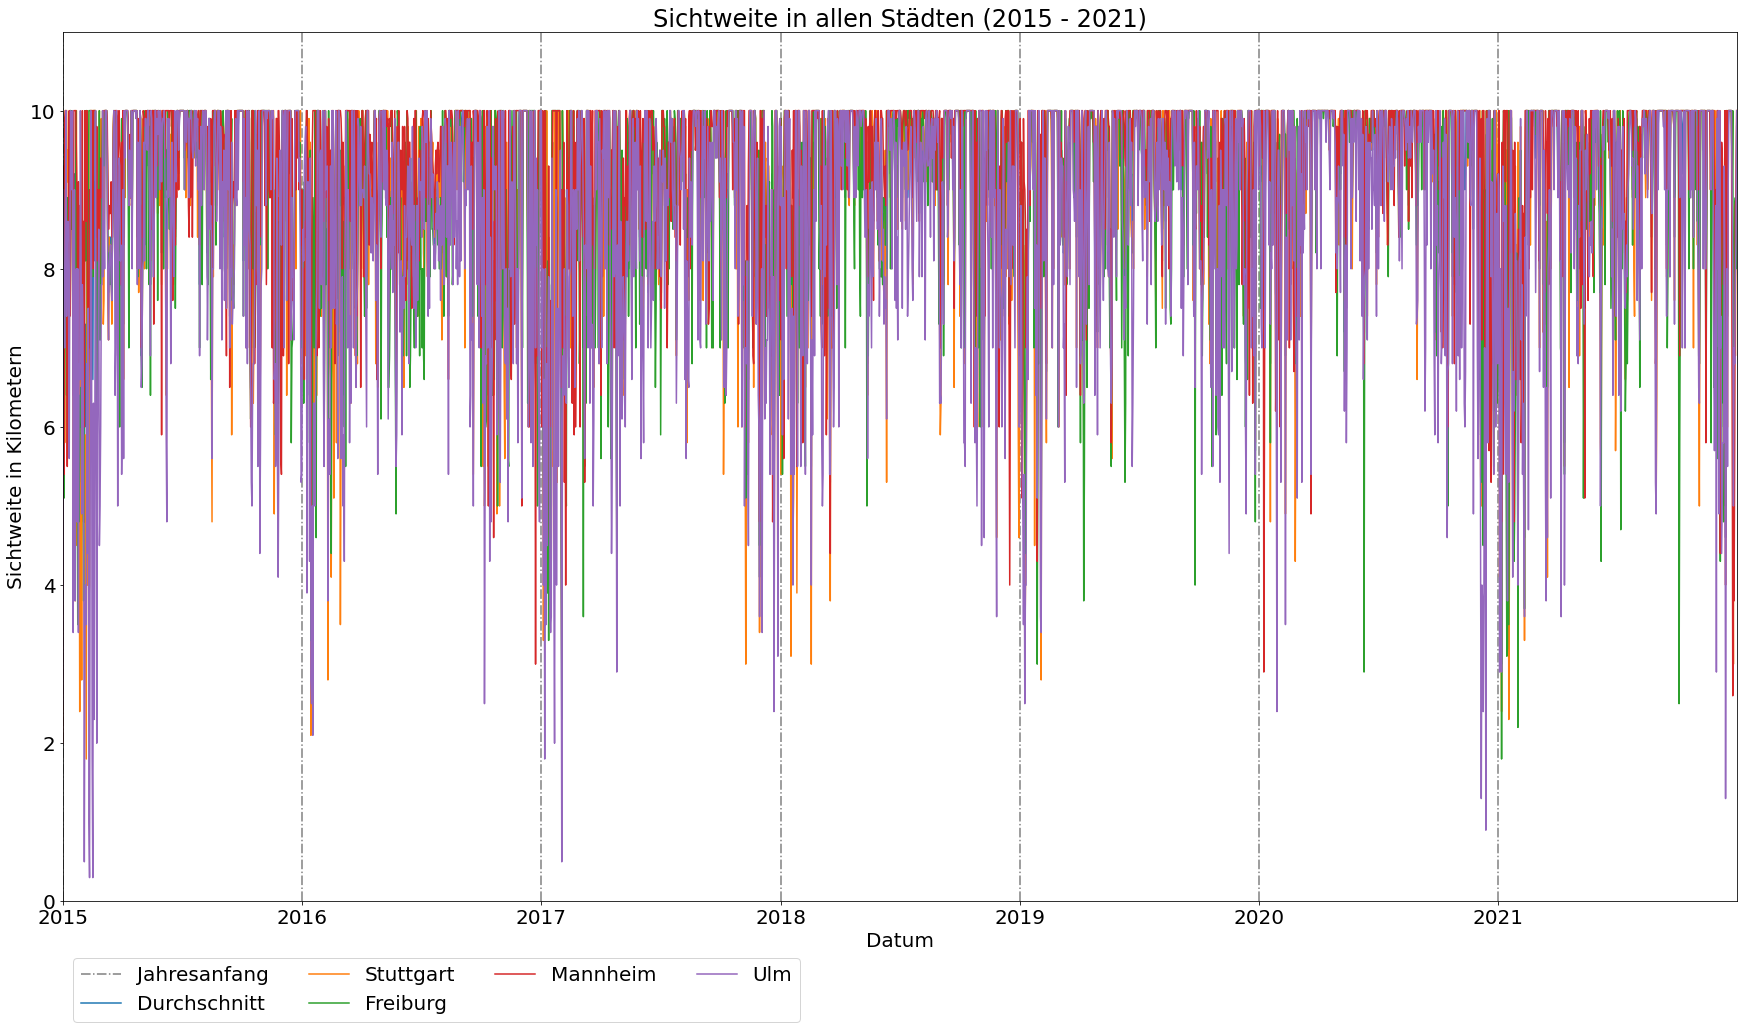



               count      mean       std  min  25%  50%   75%   max
stuttgart     2557.0  8.935941  1.388727  1.8  8.3  9.5  10.0  10.0
freiburg      2557.0  8.991279  1.322464  1.8  8.3  9.6  10.0  10.0
mannheim      2557.0  9.261478  1.128073  2.0  8.9  9.9  10.0  10.0
ulm           2557.0  8.555964  1.647125  0.3  7.8  9.0  10.0  10.0
durchschnitt  2557.0  8.938600  1.111929  3.0  8.4  9.2   9.9  10.0




In [5]:
#Jahre einzeichnen
functions.draw_years(df)

#Daten für jede Stadt und Durchschnitt plotten
plt.plot(df["durchschnitt"], label="Durchschnitt")
plt.plot(df["stuttgart"], label="Stuttgart");
plt.plot(df["freiburg"], label="Freiburg");
plt.plot(df["mannheim"], label="Mannheim");
plt.plot(df["ulm"], label="Ulm");

#Achsen und Layout
plt.title("Sichtweite in allen Städten (2015 - 2021)")
plt.ylabel("Sichtweite in Kilometern")
plt.ylim(0, 11)
plt.xlabel("Datum")
plt.xlim(dt.datetime(2015,1,1), dt.datetime(2021,12,31))

#Legende einfügen
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.15), ncol=4)

plt.show()

#Deskriptive Statistiken
print("\n")
print(df.iloc[:,1:6].describe().transpose())
print("\n")



 2015 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




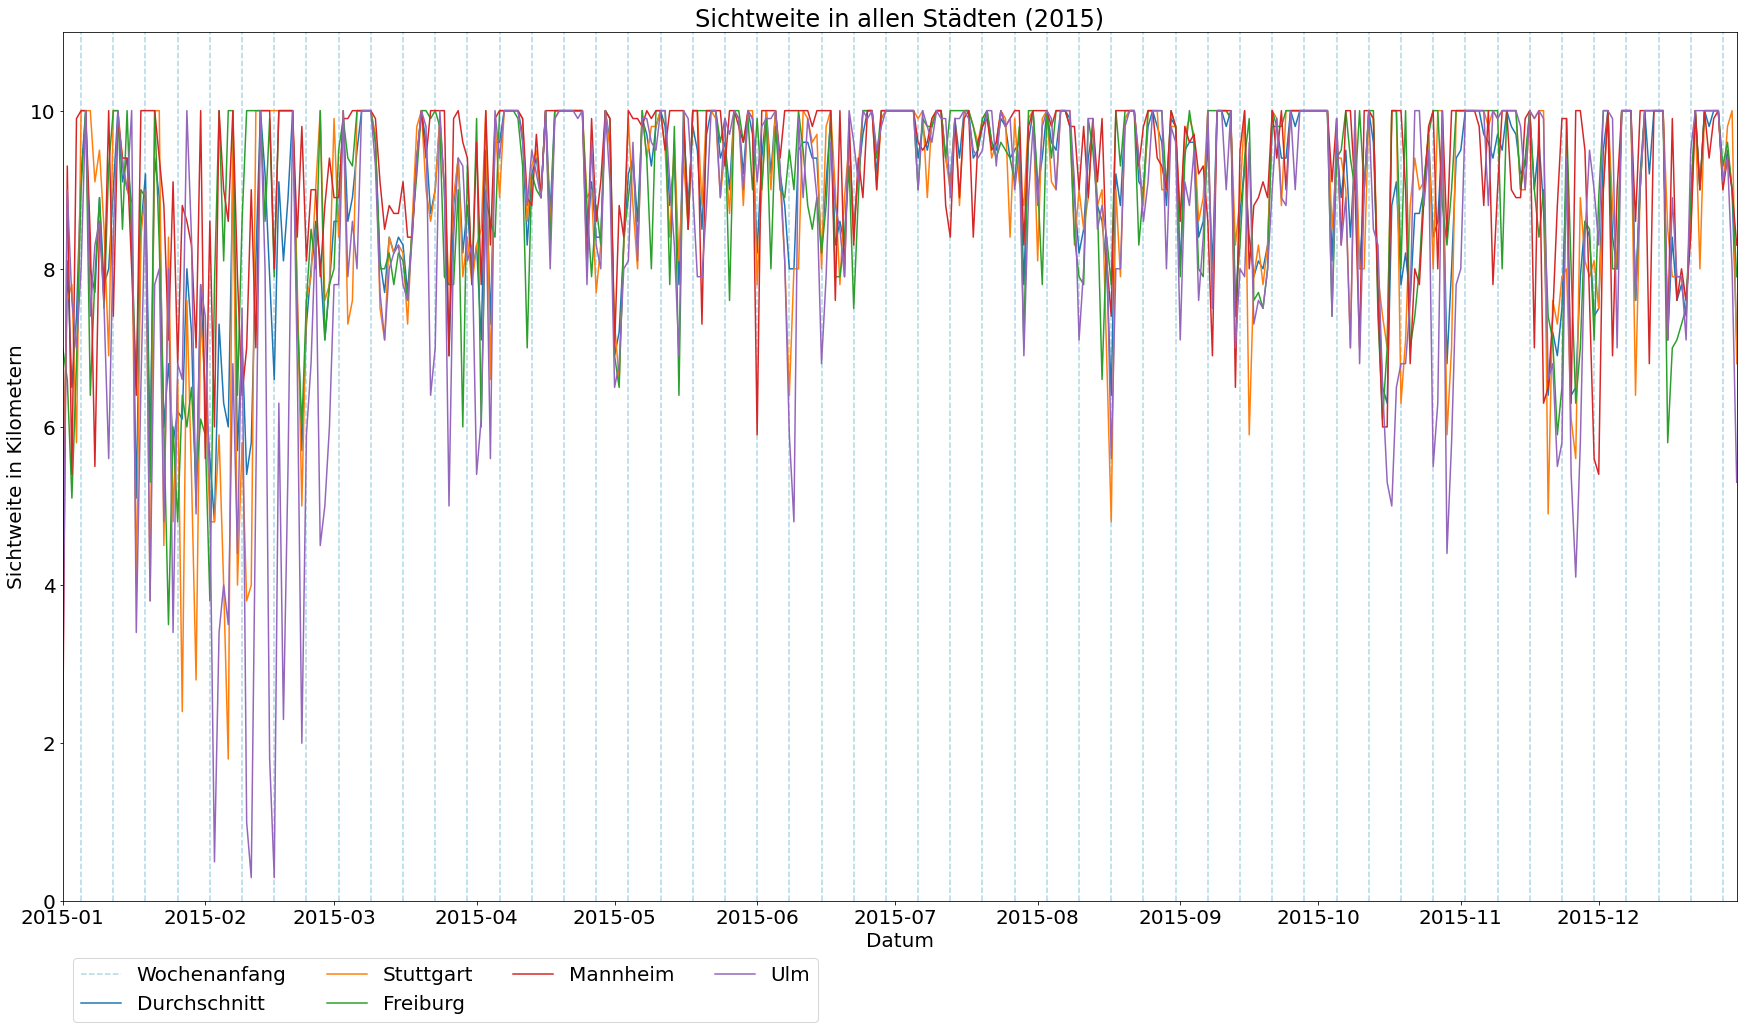



              count      mean       std  min  25%  50%   75%   max
stuttgart     365.0  8.858904  1.508769  1.8  8.2  9.4  10.0  10.0
freiburg      365.0  8.958356  1.282840  3.5  8.0  9.5  10.0  10.0
mannheim      365.0  9.224384  1.143031  2.0  8.8  9.9  10.0  10.0
ulm           365.0  8.467397  1.911864  0.3  7.8  9.0  10.0  10.0
durchschnitt  365.0  8.880548  1.175496  4.2  8.2  9.2   9.8  10.0




 2016 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




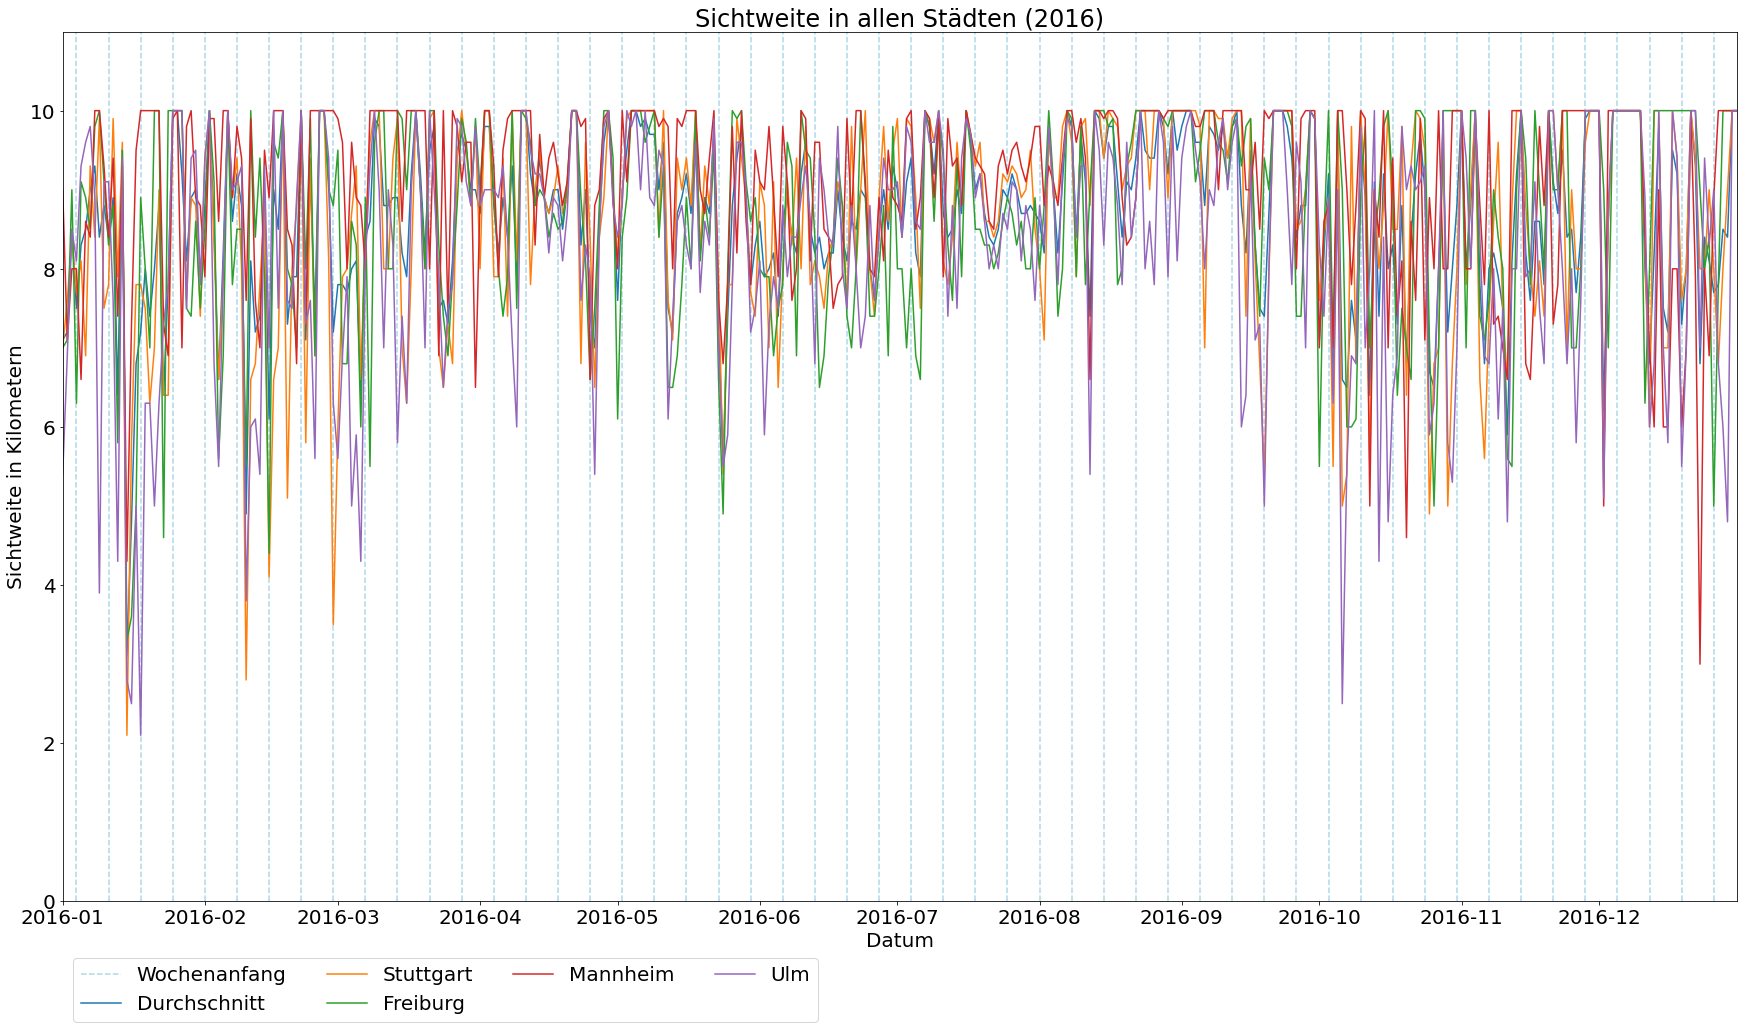



              count      mean       std  min    25%  50%   75%   max
stuttgart     366.0  8.635792  1.385859  2.1  7.900  8.9   9.9  10.0
freiburg      366.0  8.694809  1.357274  3.3  7.925  9.0  10.0  10.0
mannheim      366.0  9.076503  1.171579  3.0  8.500  9.6  10.0  10.0
ulm           366.0  8.274317  1.569939  2.1  7.500  8.8   9.5  10.0
durchschnitt  366.0  8.672678  1.052885  3.1  8.100  8.8   9.5  10.0




 2017 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




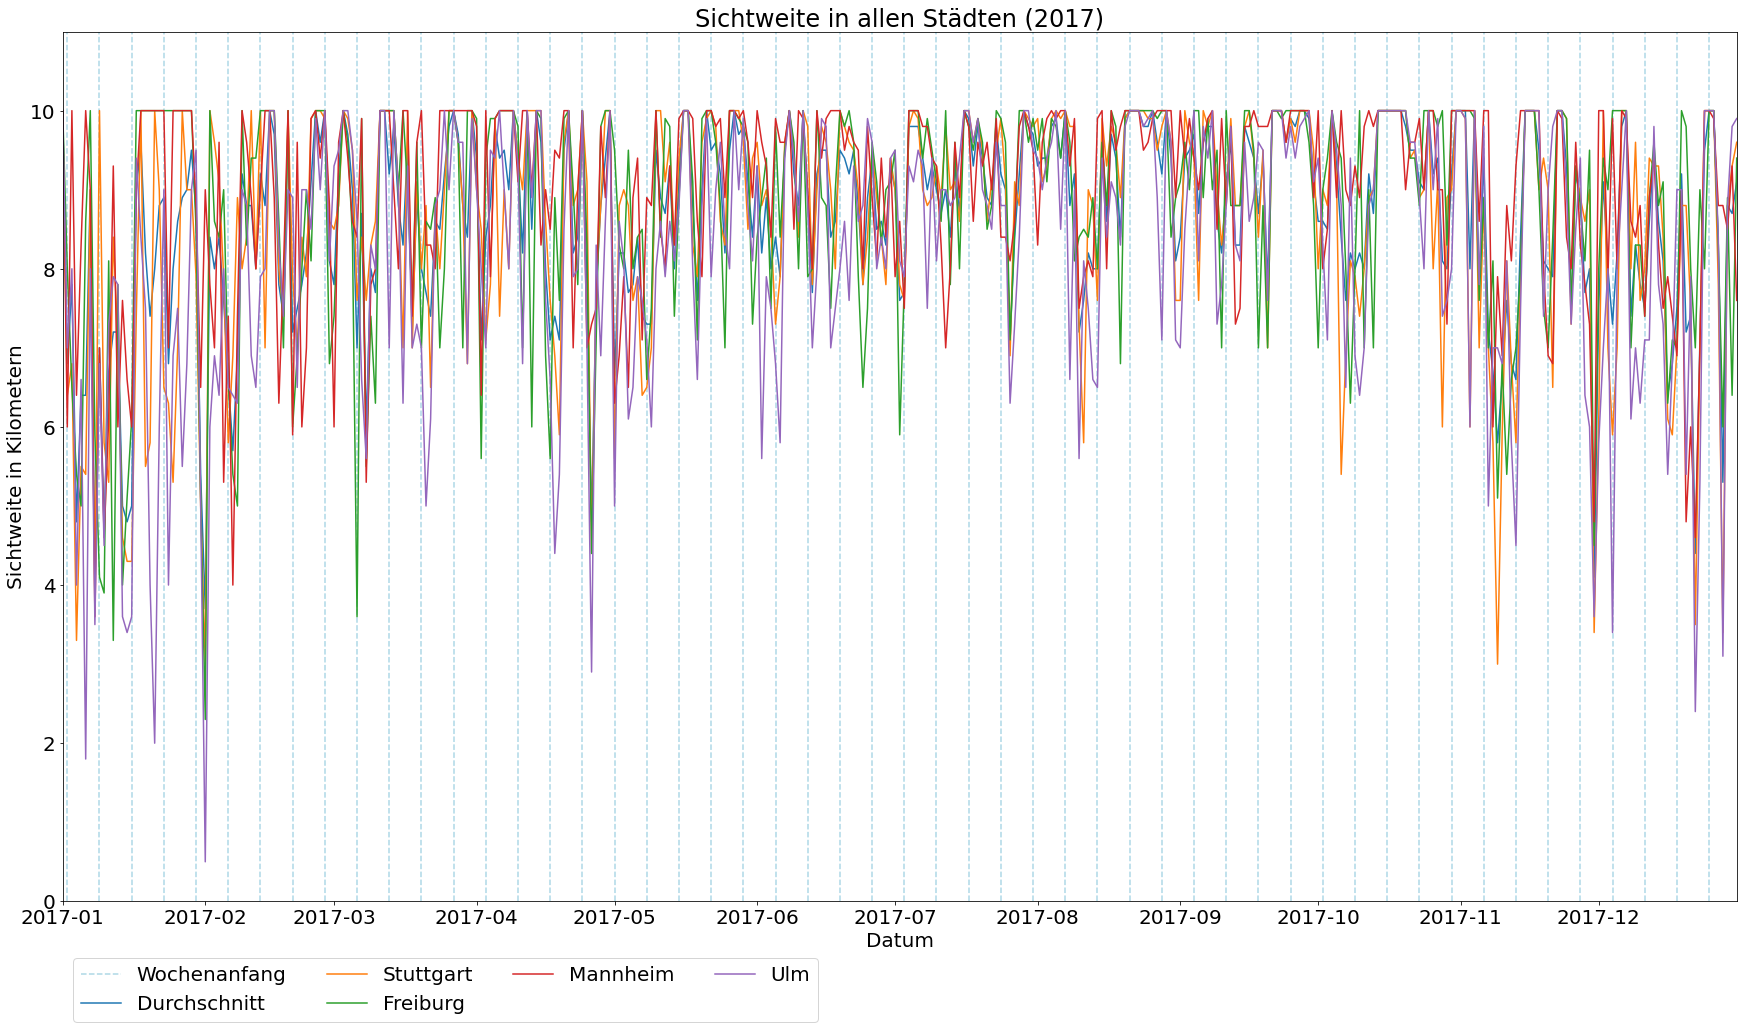



              count      mean       std  min  25%  50%   75%   max
stuttgart     365.0  8.633699  1.521978  3.0  7.9  9.0   9.9  10.0
freiburg      365.0  8.781370  1.485251  2.3  8.0  9.4  10.0  10.0
mannheim      365.0  8.991233  1.270861  3.6  8.3  9.6  10.0  10.0
ulm           365.0  8.216712  1.738991  0.5  7.1  8.6   9.6  10.0
durchschnitt  365.0  8.656712  1.227026  3.7  8.0  8.9   9.6  10.0




 2018 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




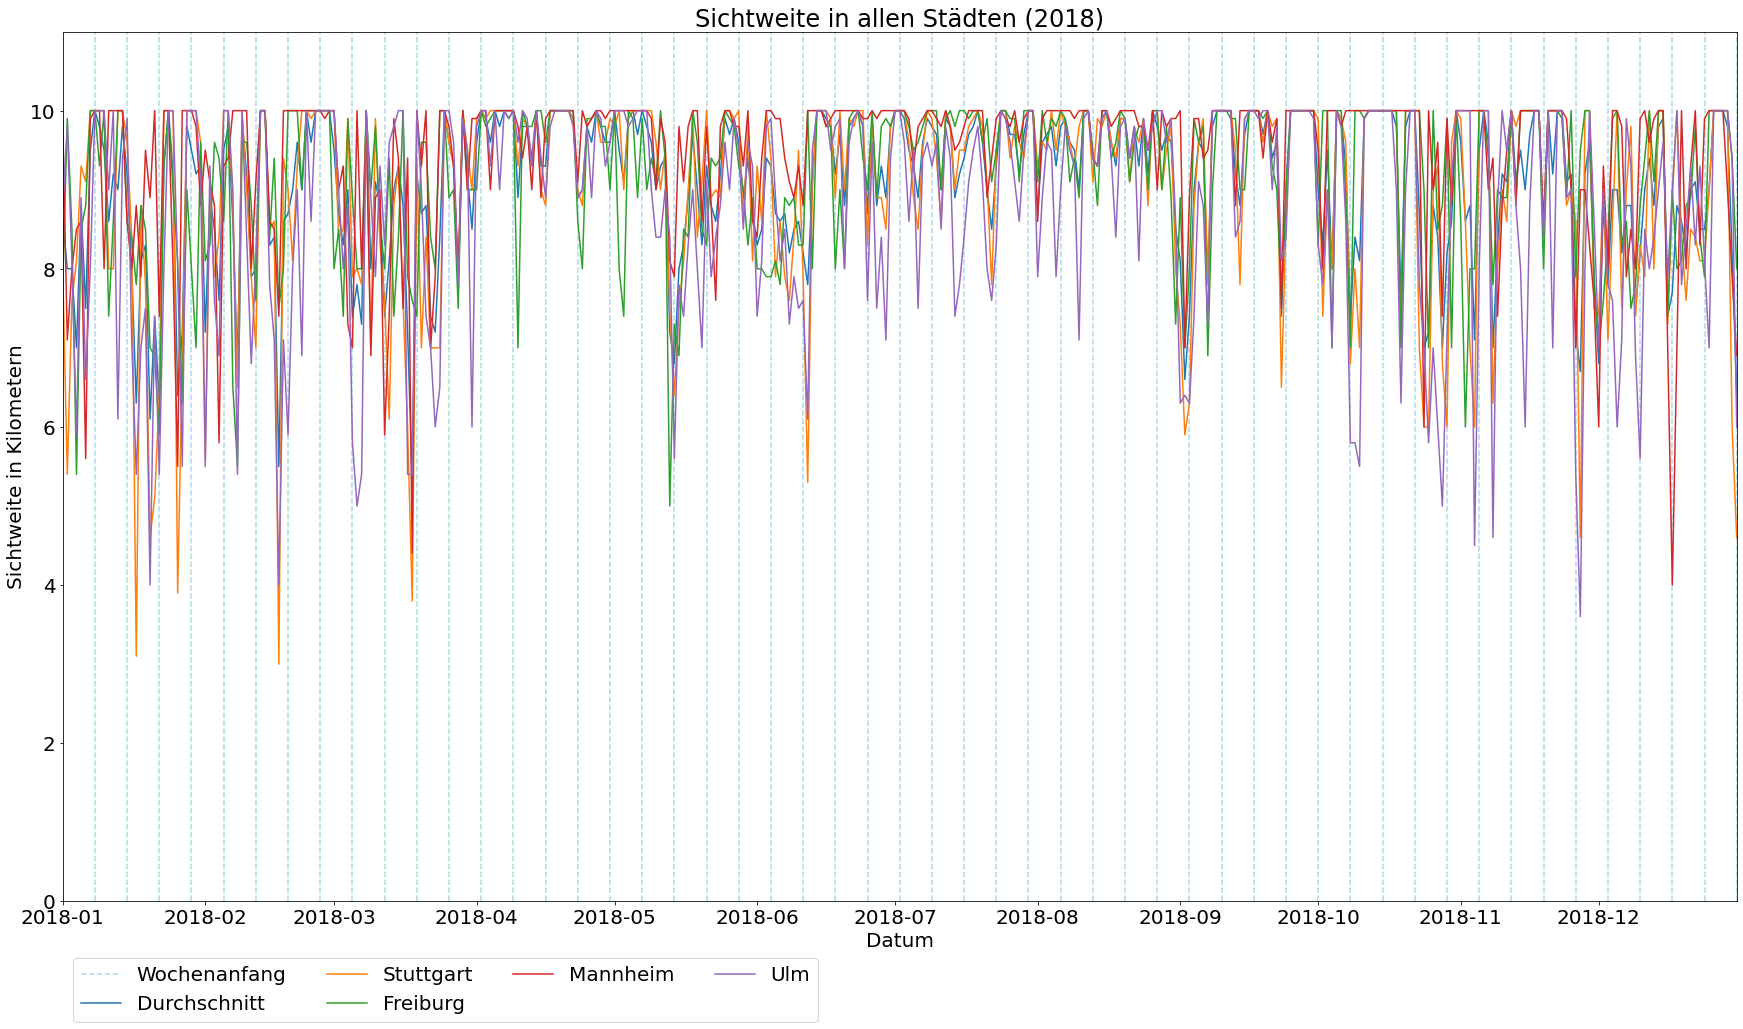



              count      mean       std  min  25%  50%   75%   max
stuttgart     365.0  9.006027  1.334091  3.0  8.4  9.6  10.0  10.0
freiburg      365.0  9.165479  1.010746  5.0  8.6  9.6  10.0  10.0
mannheim      365.0  9.435890  0.984272  4.0  9.3  9.9  10.0  10.0
ulm           365.0  8.734247  1.436114  3.6  8.0  9.3  10.0  10.0
durchschnitt  365.0  9.087671  0.945107  5.3  8.6  9.3   9.9  10.0




 2019 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




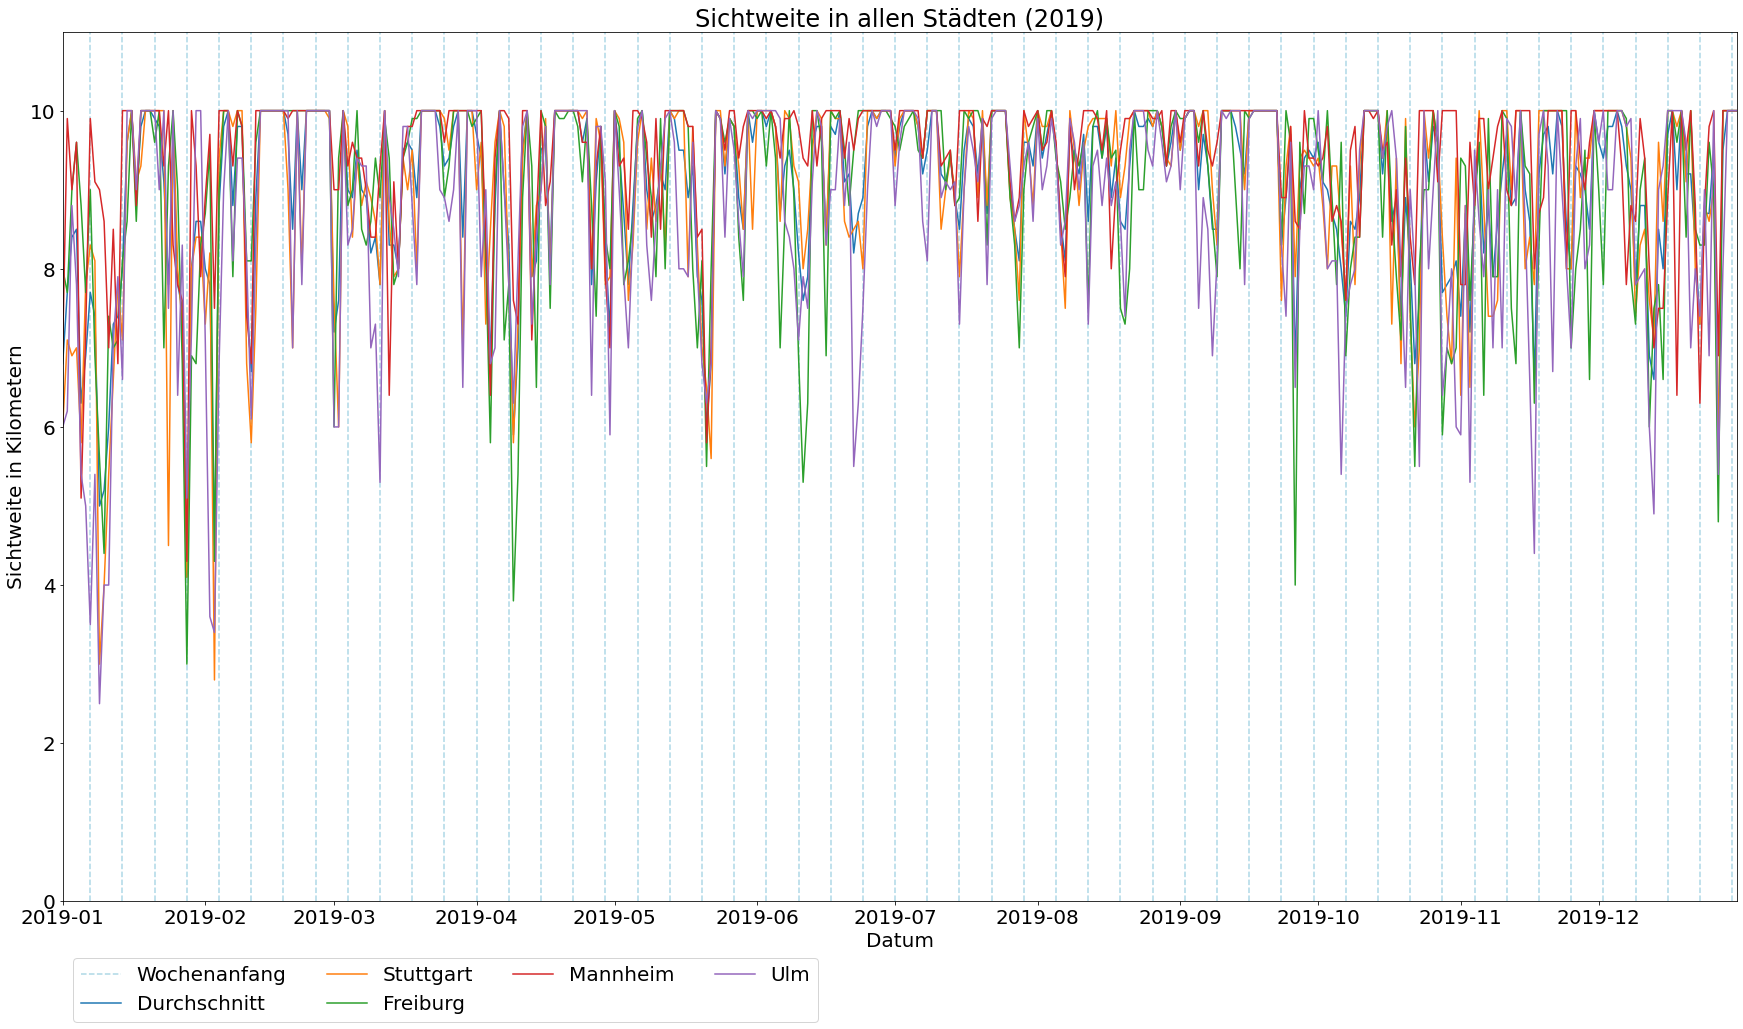



              count      mean       std  min  25%  50%   75%   max
stuttgart     365.0  9.051233  1.256731  2.8  8.4  9.5  10.0  10.0
freiburg      365.0  9.007397  1.301510  3.0  8.3  9.6  10.0  10.0
mannheim      365.0  9.401644  0.927331  4.3  9.1  9.9  10.0  10.0
ulm           365.0  8.725753  1.473127  2.5  8.0  9.1  10.0  10.0
durchschnitt  365.0  9.050137  1.042968  4.1  8.5  9.4   9.9  10.0




 2020 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




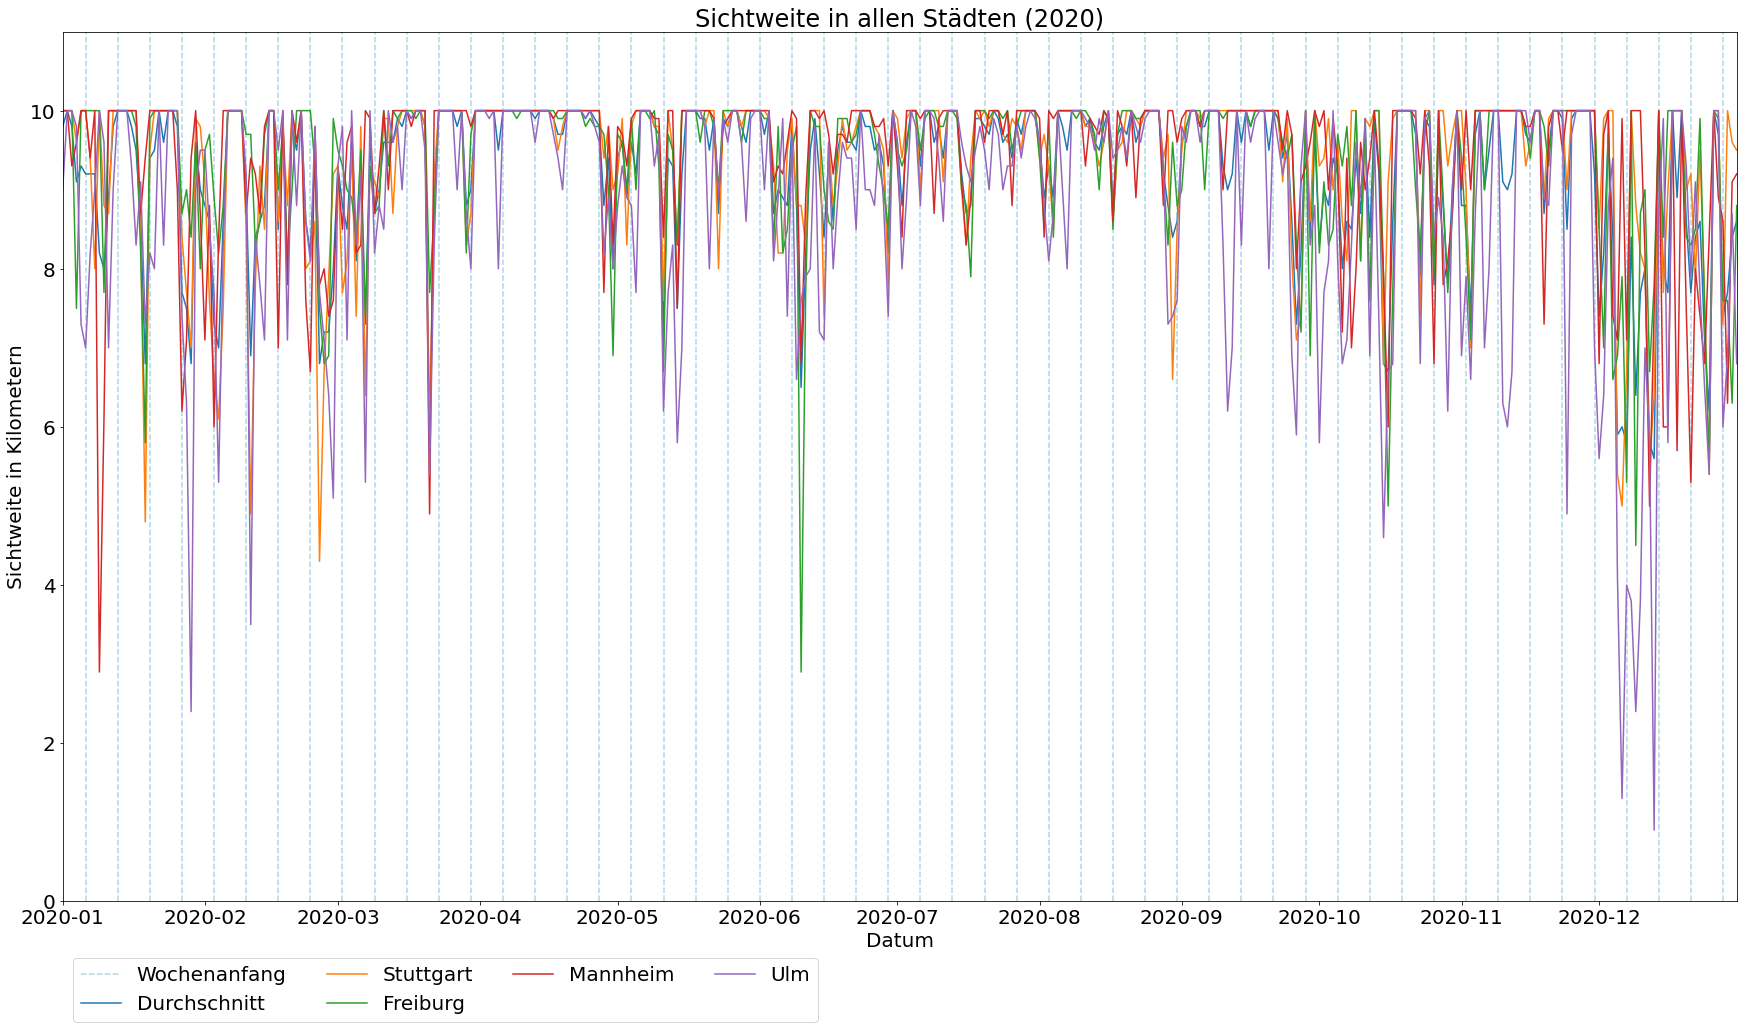



              count      mean       std  min  25%   50%   75%   max
stuttgart     366.0  9.390164  1.049911  4.3  9.2  10.0  10.0  10.0
freiburg      366.0  9.387432  1.020237  2.9  9.0   9.9  10.0  10.0
mannheim      366.0  9.418306  1.073322  2.9  9.3  10.0  10.0  10.0
ulm           366.0  8.805191  1.579058  0.9  8.1   9.5  10.0  10.0
durchschnitt  366.0  9.253279  0.946733  5.6  8.8   9.6  10.0  10.0




 2021 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




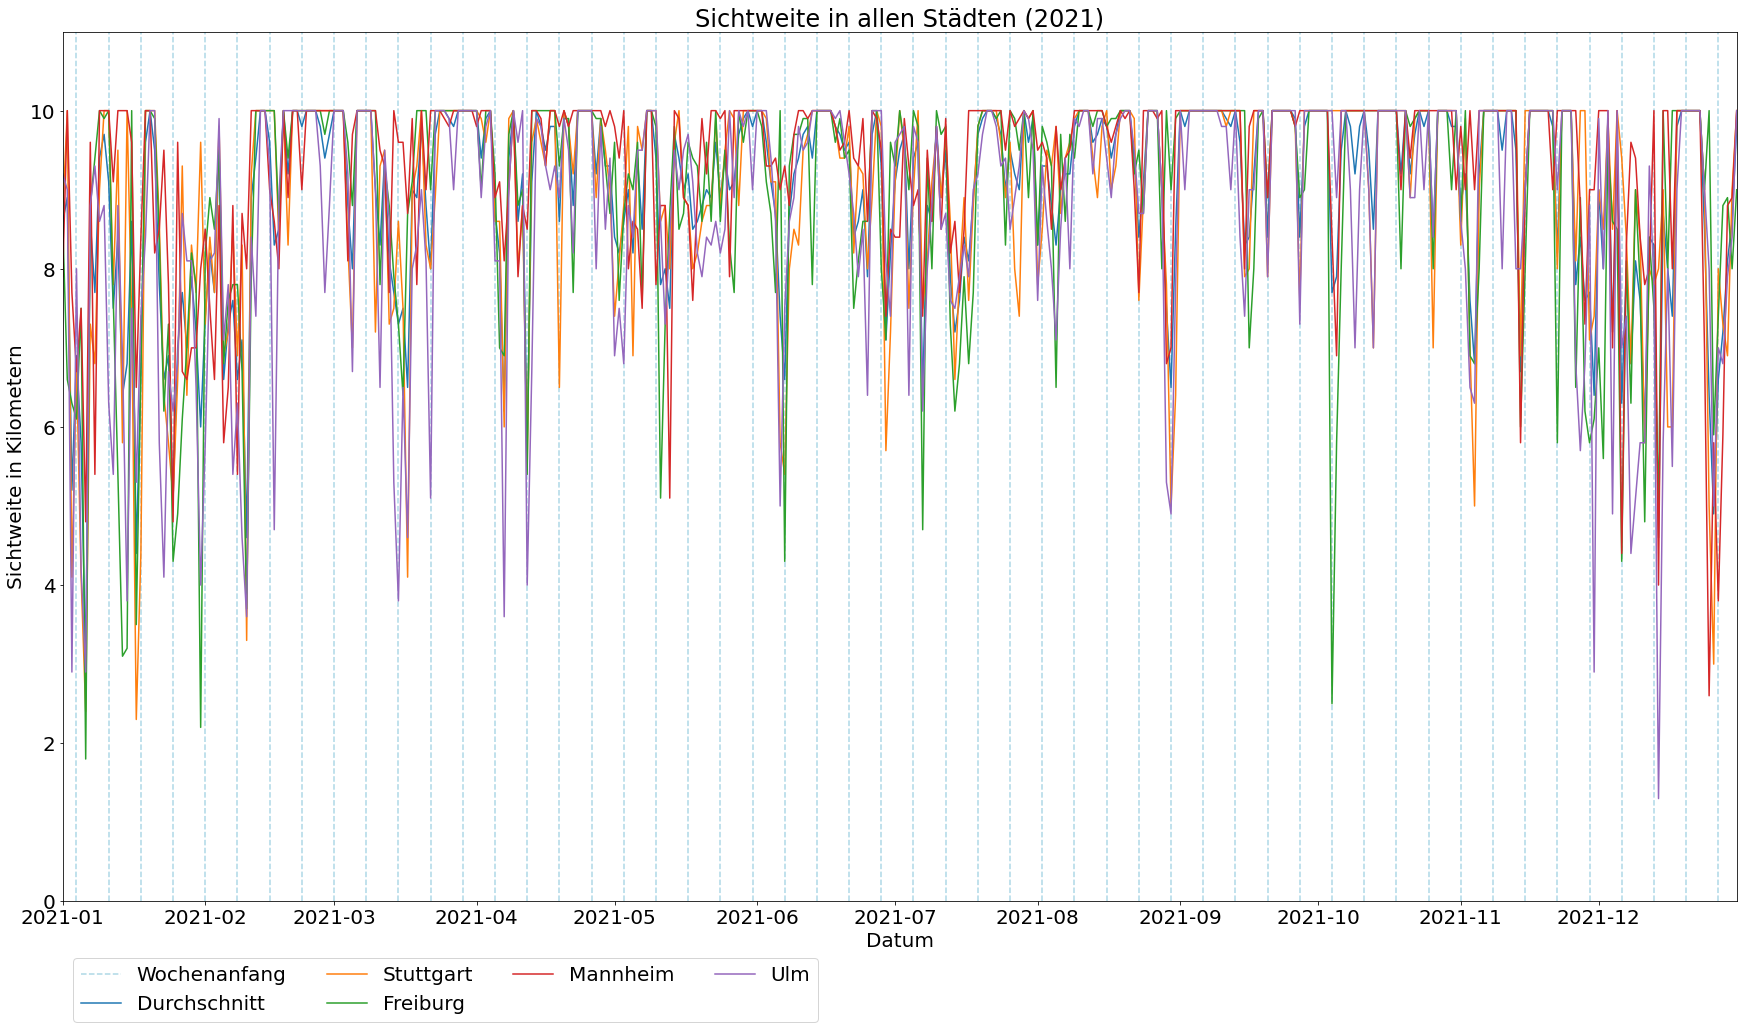



              count      mean       std  min  25%   50%   75%   max
stuttgart     365.0  8.975342  1.464149  2.3  8.3   9.8  10.0  10.0
freiburg      365.0  8.943836  1.580582  1.8  8.4   9.8  10.0  10.0
mannheim      365.0  9.282466  1.212240  2.6  8.9  10.0  10.0  10.0
ulm           365.0  8.668219  1.681747  1.3  8.0   9.2  10.0  10.0
durchschnitt  365.0  8.969041  1.230318  3.0  8.4   9.4  10.0  10.0




In [6]:
for year in [2015, 2016, 2017, 2018, 2019, 2020, 2021]:
    
    print("\n\n", str(year), "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
    
    #Untere und obere Grenze zum Filtern des DataFrames nach jeweiligem Jahr
    lower_border = str(year) + "-01-01"
    upper_border = str(year) + "-12-31"
    
    #Wochen einzeichnen
    functions.draw_weeks(df[lower_border:upper_border])
    
    #Daten für jede Stadt und Durchschnitt plotten
    plt.plot(df[lower_border:upper_border]["durchschnitt"], label="Durchschnitt")
    plt.plot(df[lower_border:upper_border]["stuttgart"], label="Stuttgart");
    plt.plot(df[lower_border:upper_border]["freiburg"], label="Freiburg");
    plt.plot(df[lower_border:upper_border]["mannheim"], label="Mannheim");
    plt.plot(df[lower_border:upper_border]["ulm"], label="Ulm");
    
    #Achsen und Layout
    plt.title("Sichtweite in allen Städten (" + str(year) + ")")
    plt.ylabel("Sichtweite in Kilometern")
    plt.ylim(0, 11)
    plt.xlabel("Datum")
    plt.xlim(dt.datetime(year,1,1), dt.datetime(year,12,31))
    
    #Legende einfügen
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.15), ncol=4)

    plt.show()
    
    #Deskriptive Statistiken
    print("\n")
    print(df[lower_border:upper_border].iloc[:,1:6].describe().transpose())
    print("\n")

<font size="5">Die Korrelationskoeffizienten zeigen, dass alle Städte mit dem Durchschnitt korrelieren. Bei Mannheim und Freiburg ist die Korrelation mit dem Durchschnitt zwar nicht so stark ausgeprägt wie bei den anderen Städten, aber trotzdem signifikant. Aus diesem Grund wird fortan nur noch der Durchschnitt aller Städte für die Analyse verwendet.</font>

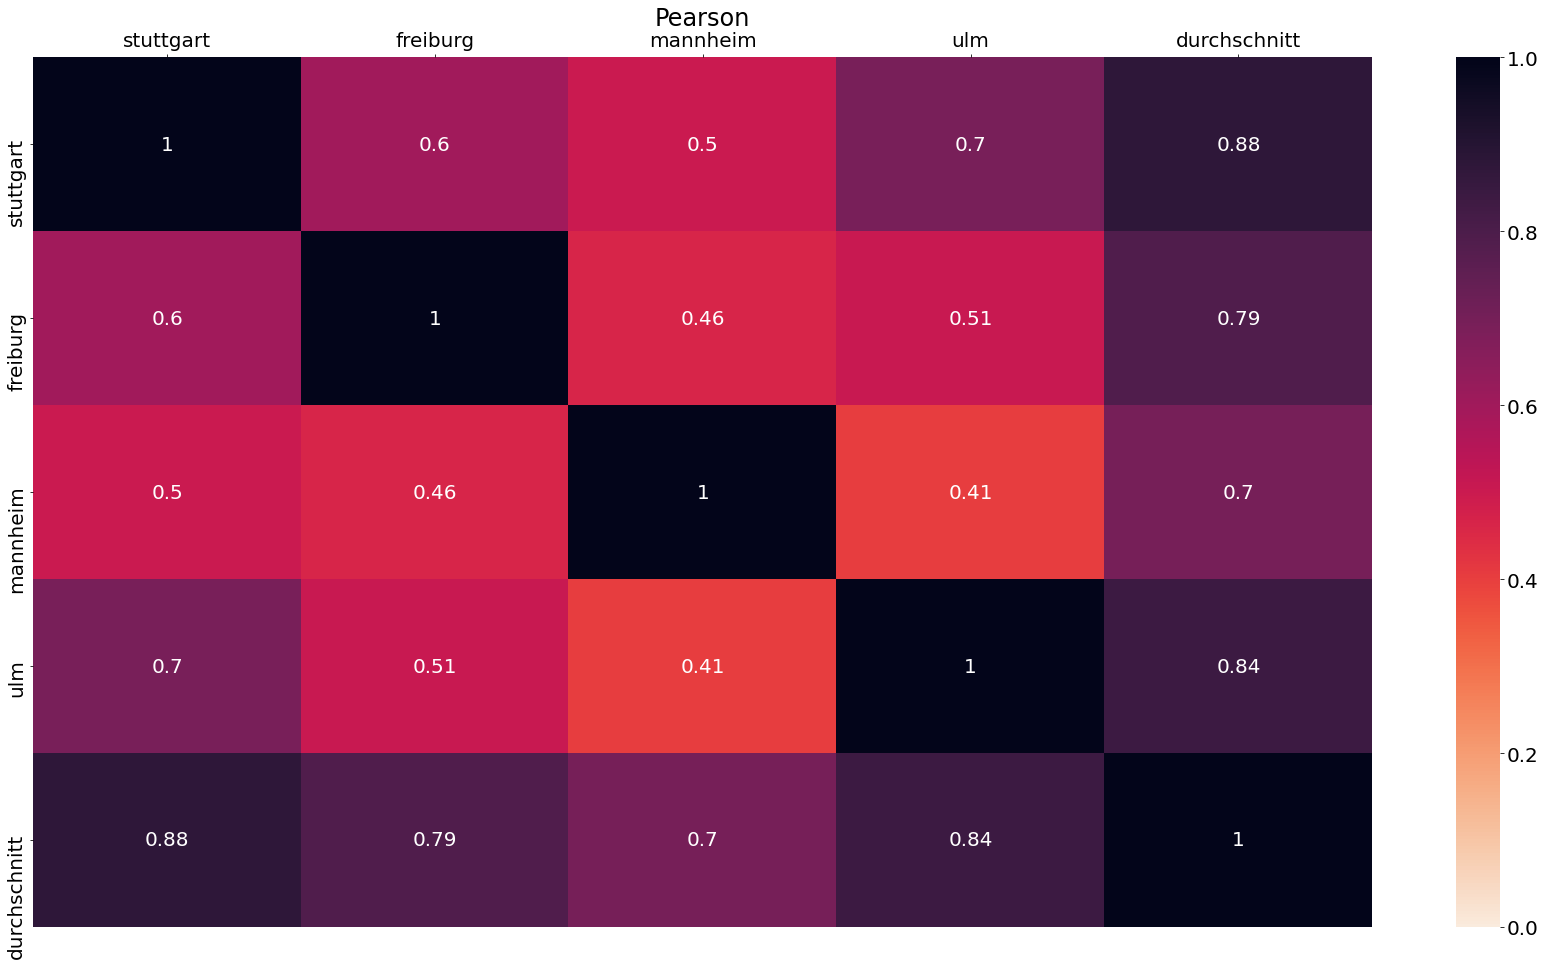

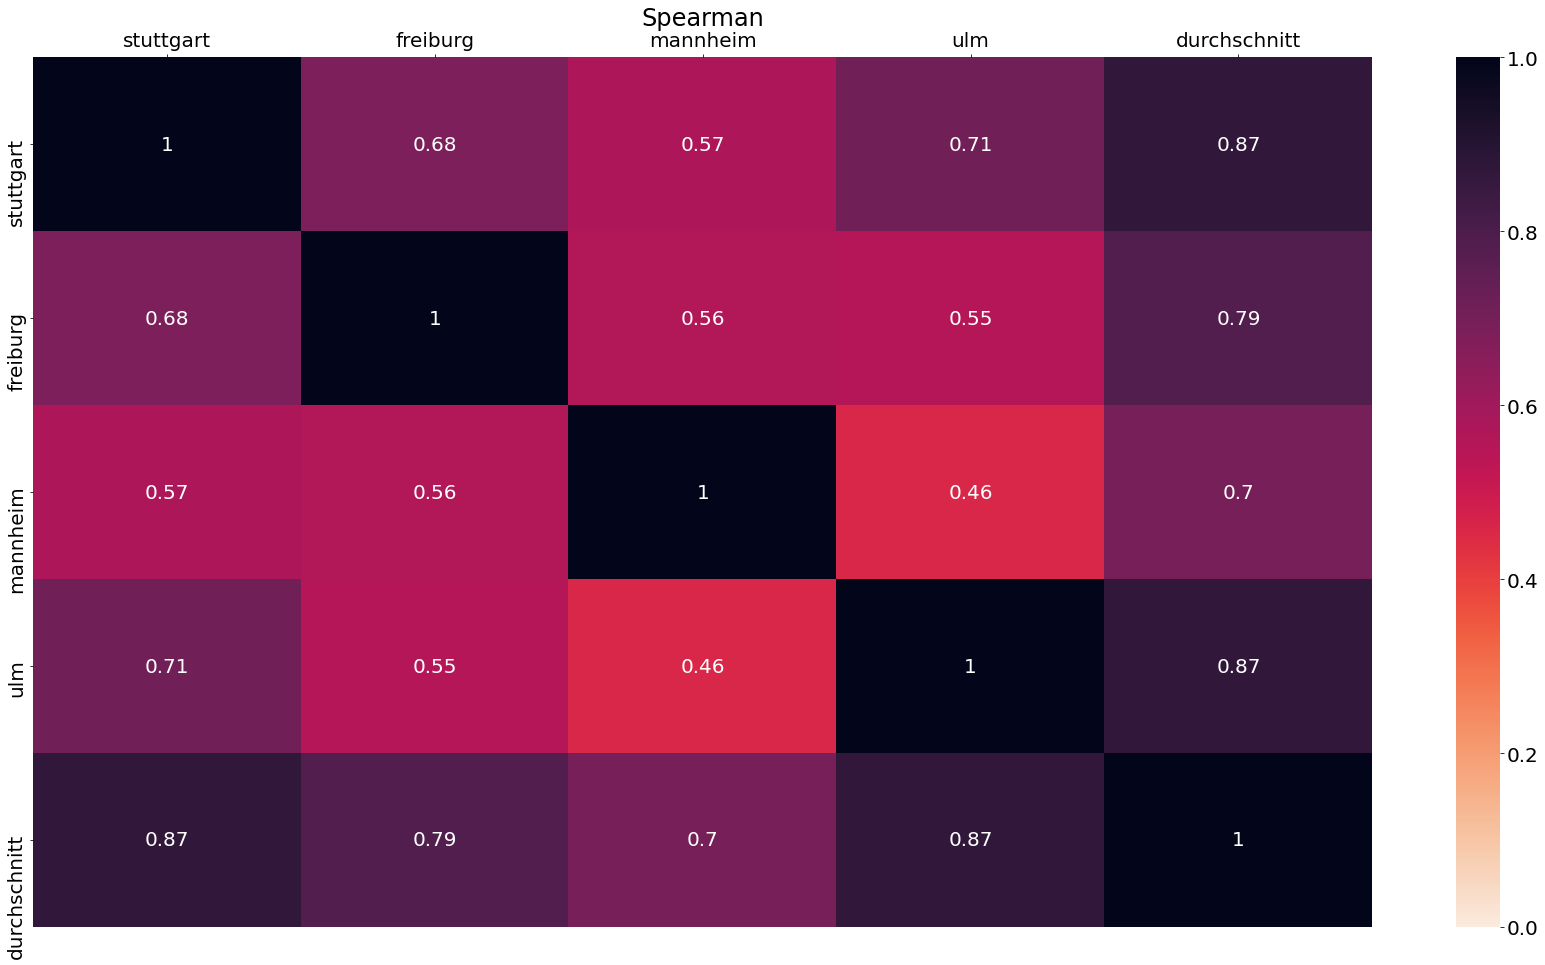

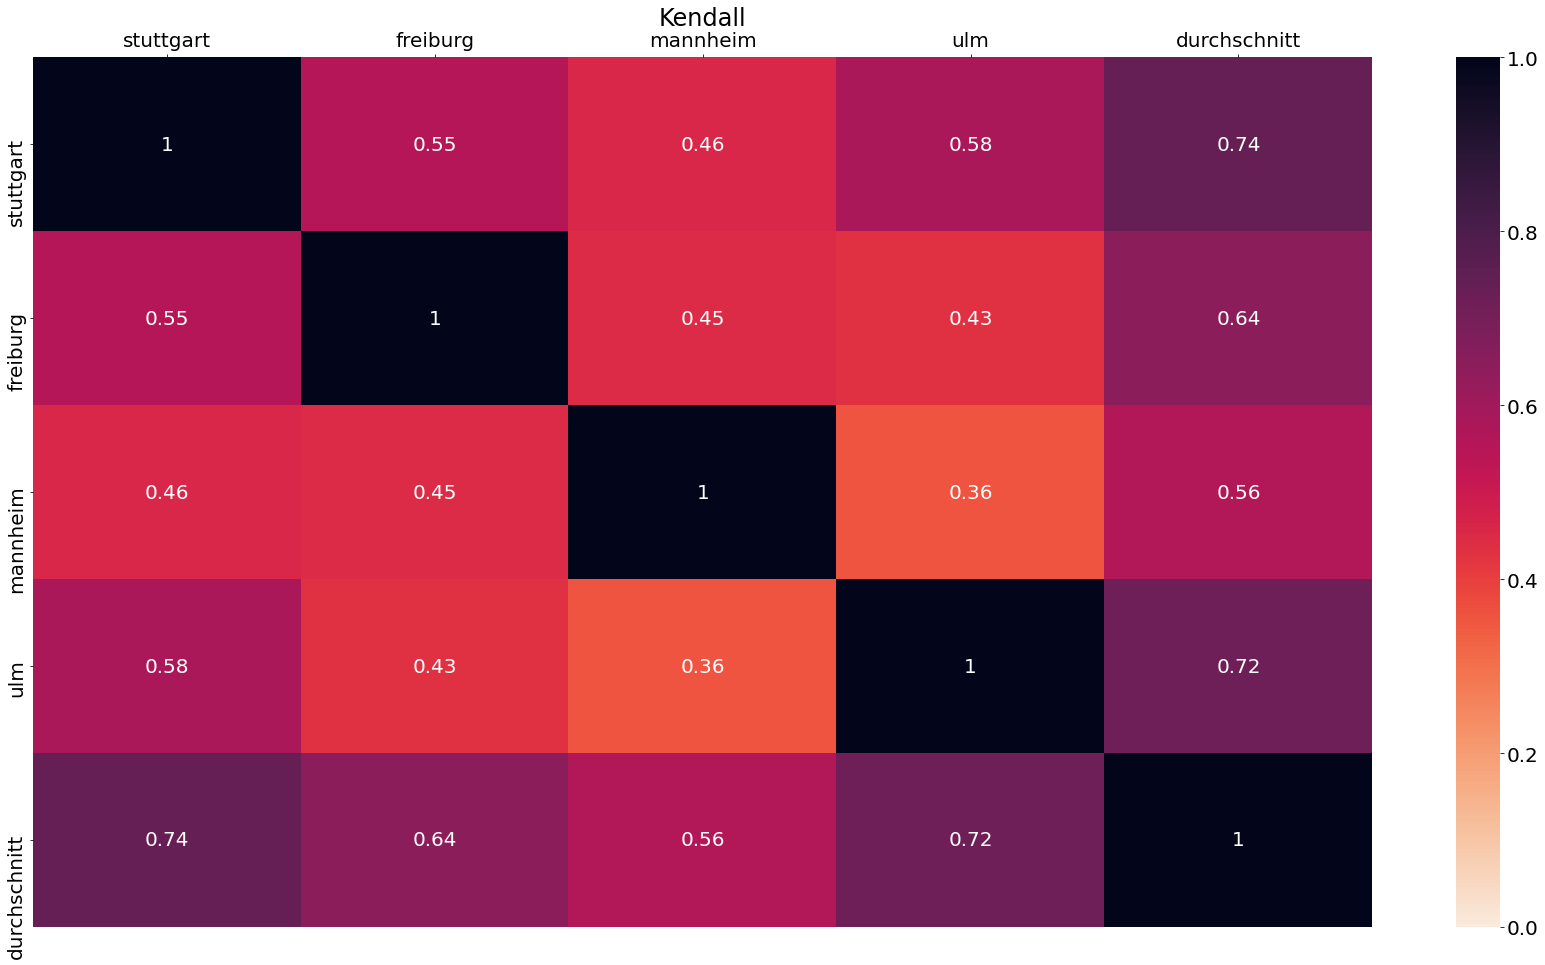

In [7]:
#Heatmap der Korrelationen untereinander (Pearson)
ax = sns.heatmap(data=df.corr(method="pearson"), annot=True, vmin=0, vmax=1, cmap="rocket_r");
ax.set_title("Pearson")
ax.xaxis.set_ticks_position("top")

plt.show()

#Heatmap der Korrelationen untereinander (Spearman)
ax = sns.heatmap(data=df.corr(method="spearman"), annot=True, vmin=0, vmax=1, cmap="rocket_r");
ax.set_title("Spearman")
ax.xaxis.set_ticks_position("top")

plt.show()

#Heatmap der Korrelationen untereinander (Kendall)
ax = sns.heatmap(data=df.corr(method="kendall"), annot=True, vmin=0, vmax=1, cmap="rocket_r");
ax.set_title("Kendall")
ax.xaxis.set_ticks_position("top")

plt.show()

# <font size="7">Fazit</font>
<font size="5">Die Werte der einzelnen Städte sind untereinander etwas schwächer korreliert, bewegen sich allerdings synchron und sind einigermaßen ausreichend stark mit dem Durchschnitt korreliert. Daher wird im Folgenden nun noch der Durchschnitt über alle Städte verwendet.</font>